# Text Mining

## Arbeiten mit Jupyter Notebooks


[Jupyter Notebooks](https://jupyter.org/) sind eine browserbasierte Oberfläche um mit Skriptsprachen, wie [R](https://www.r-project.org/), zu interagieren. Notebooks bestehen aus bestehen aus *Zellen*. Die zwei wichtigsten Arten von Zellen sind:
+ Markdown Zellen für formatieren Text und
+ Code Zellen für Quelltext der ausgeführt werden soll.


Um Code in einer Zelle ausführbar zu machen können Sie beispielsweise folgenden R-Quelltext in das untere Textfeld kopieren   

```R
str_variable_name <- "Hallo Jupyter"
print(str_variable_name)
```

Um den Code in der Zelle auszuführen drücken Sie `Shift-Enter`

## Vergleichende Analyse von Twitter Profielen

Twitter spielt eine zuhnehmend wichtige rolle in der politischen Kommunikation. In diesem Notbook wird der Vergleich von der Aktivität von Bernd Riexinger (Die Linke) und Alice Weidel (AFD) besprochen. Sowohl [Bernd Riexinger](https://twitter.com/b_riexinger) als auch [Alice Weidel](https://twitter.com/Alice_Weidel) haben öffentlich zugägngliche Profiele auf Twitter. Im Notebook [get_tweets](./get_tweets.ipynb) werden diese aus Twitter geladen. Das Notebook nutzt das R-Paket [tidytext](https://cran.r-project.org/web/packages/tidytext/index.html) und folgt der sehr guten [Dokumentation](https://www.tidytextmining.com) für den [Vergleich von Twitter Archieven](https://www.tidytextmining.com/twitter.html).



## Import der Daten

Im ersten Schritt importieren wir benötigte R-Pakete. Dann laden die Daten in die Analyseumgebung und werfen einen Blick auf die Verteilung der Häufigkeiten von Tweets über die Zeit.

In [1]:
library(lubridate)
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)
library(scales)
library(tidytext)
library(stringr)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘dplyr’

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘scales’

The following object is masked from ‘package:readr’:

    col_factor



In [2]:
b_riexinger.csv <- read_csv("data/b_riexinger.csv")
alice_weidel.csv <- read_csv("data/alice_weidel.csv")

Parsed with column specification:
cols(
  date = col_datetime(format = ""),
  username = col_character(),
  to = col_character(),
  replies = col_integer(),
  retweets = col_integer(),
  favorites = col_integer(),
  text = col_character(),
  geo = col_character(),
  mentions = col_character(),
  hashtags = col_character(),
  id = col_double(),
  permalink = col_character()
)
Parsed with column specification:
cols(
  date = col_datetime(format = ""),
  username = col_character(),
  to = col_character(),
  replies = col_integer(),
  retweets = col_integer(),
  favorites = col_integer(),
  text = col_character(),
  geo = col_character(),
  mentions = col_character(),
  hashtags = col_character(),
  id = col_double(),
  permalink = col_character()
)


In [3]:
tweets <- bind_rows(b_riexinger.csv %>% mutate(collection = "b_riexinger"),
                    alice_weidel.csv %>% mutate(collection = "Alice_Weidel")) 

### Was wir importiert haben und der Pipe `%>%` Operator

In [4]:
tweets %>% head()

date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,collection
2020-01-18 07:20:08,b_riexinger,NA,28,31,174,"Die CDU versucht mal wieder, die Einführung der Grundrente mit Scheinargumenten zu verzögern! Und das trotz hoher Überschüsse in Milliardenhöhe. Zeit, für eine neue Regierung. #Grundrente",NA,NA,#Grundrente,1.218433e+18,https://twitter.com/b_riexinger/status/1218432870710116352,b_riexinger
2020-01-17 15:24:48,b_riexinger,NA,5,13,42,Ein Krieg der #USA mit einem Militärbudget von fast 650 Mrd $gegen die Regionalmacht #Iran mit 13 Mrd $hätte kaum zu überblickende negative Folgen. Er würde die gesamte Region ins Chaos stürzen und wäre auch eine ökologische Katastrophe. #NoWarWithIran,NA,NA,#USA #Iran #NoWarWithIran,1.218192e+18,https://twitter.com/b_riexinger/status/1218192454245134339,b_riexinger
2020-01-17 08:49:06,b_riexinger,NA,38,77,386,"Soldaten unter 18 Jahren sind in meinen Augen nichts anderes als #Kindersoldaten. Es ist unerträglich, dass die #Bundeswehr immer wieder mit Ständen auf der Gamescom, Jugendoffizieren, Abenteuercamps gezielt um Minderjährige werbe!",NA,NA,#Kindersoldaten #Bundeswehr,1.218093e+18,https://twitter.com/b_riexinger/status/1218092873301876736,b_riexinger
2020-01-16 18:04:10,b_riexinger,NA,11,2,94,"Heute habe ich im Bundestag für die Widerspruchsregel bei Organspenden gestimmt. Schade, dass diese Lösung keine Mehrheit gefunden hat. Es gibt so viele Menschen, die auf ein Organ warten in Deutschland. #Organspende",NA,NA,#Organspende,1.217870e+18,https://twitter.com/b_riexinger/status/1217870171299295234,b_riexinger
2020-01-16 11:47:09,b_riexinger,NA,2,12,94,So wird das nichts mit den #Klimazielen. Das Jahr 2038 für den #Kohleausstieg ist zu spät. Weitere Subventionen in Milliardenhöhe sind auch eher ein unnötiges Wahlgeschenk von #Scholz an die Kohleindustrie. Die Mitarbeiter und der Klimaschutz haben nichts davon.,NA,NA,#Klimazielen #Kohleausstieg #Scholz,1.217775e+18,https://twitter.com/b_riexinger/status/1217775291210268676,b_riexinger
2020-01-16 08:25:11,b_riexinger,NA,26,54,230,"„Gleich in „mehrfacher Hinsicht"" habe das Ministerium „gegen das geltende Vergaberecht verstoßen""!“ Was braucht es denn noch, dass Verkehrsminister #Scheuer endlich seinen #Rücktritt erklärt?! #Maut",NA,NA,#Scheuer #R #Maut,1.217724e+18,https://twitter.com/b_riexinger/status/1217724463829192704,b_riexinger


In [5]:
tweets %>% select("date", "username", "text") %>%  head()

date,username,text
2020-01-18 07:20:08,b_riexinger,"Die CDU versucht mal wieder, die Einführung der Grundrente mit Scheinargumenten zu verzögern! Und das trotz hoher Überschüsse in Milliardenhöhe. Zeit, für eine neue Regierung. #Grundrente"
2020-01-17 15:24:48,b_riexinger,Ein Krieg der #USA mit einem Militärbudget von fast 650 Mrd $gegen die Regionalmacht #Iran mit 13 Mrd $hätte kaum zu überblickende negative Folgen. Er würde die gesamte Region ins Chaos stürzen und wäre auch eine ökologische Katastrophe. #NoWarWithIran
2020-01-17 08:49:06,b_riexinger,"Soldaten unter 18 Jahren sind in meinen Augen nichts anderes als #Kindersoldaten. Es ist unerträglich, dass die #Bundeswehr immer wieder mit Ständen auf der Gamescom, Jugendoffizieren, Abenteuercamps gezielt um Minderjährige werbe!"
2020-01-16 18:04:10,b_riexinger,"Heute habe ich im Bundestag für die Widerspruchsregel bei Organspenden gestimmt. Schade, dass diese Lösung keine Mehrheit gefunden hat. Es gibt so viele Menschen, die auf ein Organ warten in Deutschland. #Organspende"
2020-01-16 11:47:09,b_riexinger,So wird das nichts mit den #Klimazielen. Das Jahr 2038 für den #Kohleausstieg ist zu spät. Weitere Subventionen in Milliardenhöhe sind auch eher ein unnötiges Wahlgeschenk von #Scholz an die Kohleindustrie. Die Mitarbeiter und der Klimaschutz haben nichts davon.
2020-01-16 08:25:11,b_riexinger,"„Gleich in „mehrfacher Hinsicht"" habe das Ministerium „gegen das geltende Vergaberecht verstoßen""!“ Was braucht es denn noch, dass Verkehrsminister #Scheuer endlich seinen #Rücktritt erklärt?! #Maut"


In [6]:
head(tweets[, c("date", "username", "text")], n = 5)

date,username,text
2020-01-18 07:20:08,b_riexinger,"Die CDU versucht mal wieder, die Einführung der Grundrente mit Scheinargumenten zu verzögern! Und das trotz hoher Überschüsse in Milliardenhöhe. Zeit, für eine neue Regierung. #Grundrente"
2020-01-17 15:24:48,b_riexinger,Ein Krieg der #USA mit einem Militärbudget von fast 650 Mrd $gegen die Regionalmacht #Iran mit 13 Mrd $hätte kaum zu überblickende negative Folgen. Er würde die gesamte Region ins Chaos stürzen und wäre auch eine ökologische Katastrophe. #NoWarWithIran
2020-01-17 08:49:06,b_riexinger,"Soldaten unter 18 Jahren sind in meinen Augen nichts anderes als #Kindersoldaten. Es ist unerträglich, dass die #Bundeswehr immer wieder mit Ständen auf der Gamescom, Jugendoffizieren, Abenteuercamps gezielt um Minderjährige werbe!"
2020-01-16 18:04:10,b_riexinger,"Heute habe ich im Bundestag für die Widerspruchsregel bei Organspenden gestimmt. Schade, dass diese Lösung keine Mehrheit gefunden hat. Es gibt so viele Menschen, die auf ein Organ warten in Deutschland. #Organspende"
2020-01-16 11:47:09,b_riexinger,So wird das nichts mit den #Klimazielen. Das Jahr 2038 für den #Kohleausstieg ist zu spät. Weitere Subventionen in Milliardenhöhe sind auch eher ein unnötiges Wahlgeschenk von #Scholz an die Kohleindustrie. Die Mitarbeiter und der Klimaschutz haben nichts davon.


Wie viel haben wir importiert?

In [7]:
tweets %>% nrow()

[1] 1165

Anzeigen von Dokumentation

In [8]:
?nrow

nrow {base},R Documentation
x,"a vector, array or data frame"


In [9]:
tweets %>% filter(username == "b_riexinger") %>% nrow()

[1] 683

In [10]:
tweets %>% select("username") %>% table()

.
Alice_Weidel  b_riexinger 
         482          683 

### Plot der Verteilung von Tweets über die Zeit

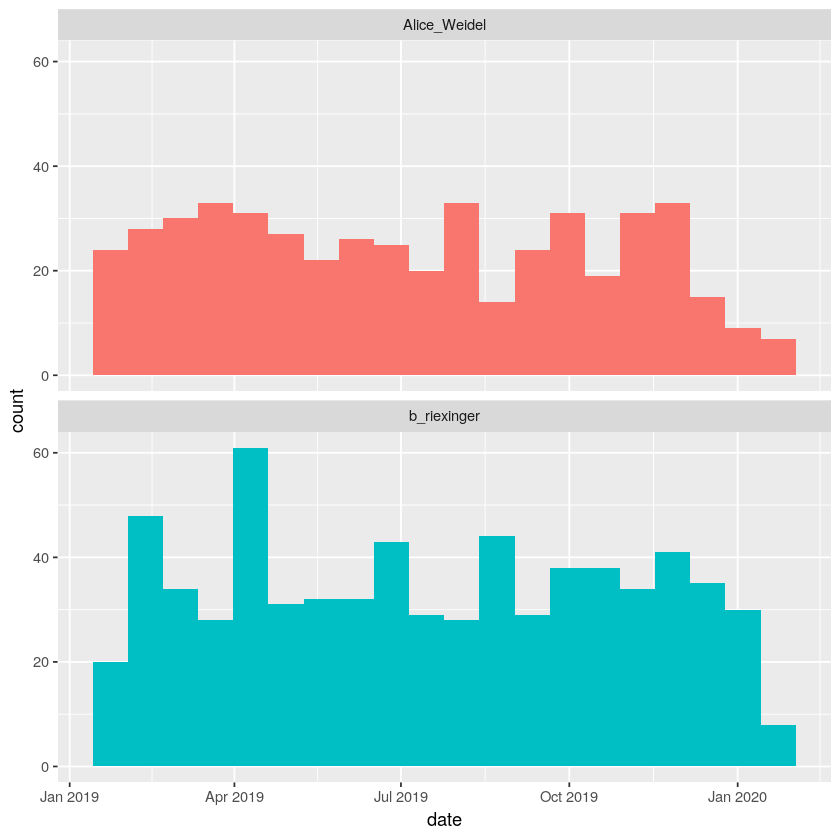

In [11]:
tweets %>% ggplot(aes(x = date, fill = collection)) +
  geom_histogram(position = "identity", bins = 20, show.legend = FALSE) +
  facet_wrap(~collection, ncol = 1)

## Frequenzanalyse

[Stoppwörter](https://de.wikipedia.org/wiki/Stoppwort) sind Wörter die häufig auftreten und wenig Relevanz für die Erfassung des Dokumentinhalts besitzen.

In [12]:
stopwords <- get_stopwords(language = "de")$word

In [13]:
stopwords %>% head()

[1] "aber"  "alle"  "allem" "allen" "aller" "alles"

In [14]:
tidy_tweets <- tweets %>% 
  filter(!str_detect(text, "^RT")) %>%
  mutate(text = str_remove_all(text, "&amp;|&lt;|&gt;")) %>%
  unnest_tokens(word, text, token = "tweets") %>%
  filter(!word %in% stopwords,
         !word %in% str_remove_all(stopwords, "'"),
         str_detect(word, "[a-z]"),
         nchar(word) > 2,
        )

tidy_tweets %>% head()

date,username,to,replies,retweets,favorites,geo,mentions,hashtags,id,permalink,collection,word
2020-01-18 07:20:08,b_riexinger,NA,28,31,174,NA,NA,#Grundrente,1.218433e+18,https://twitter.com/b_riexinger/status/1218432870710116352,b_riexinger,cdu
2020-01-18 07:20:08,b_riexinger,NA,28,31,174,NA,NA,#Grundrente,1.218433e+18,https://twitter.com/b_riexinger/status/1218432870710116352,b_riexinger,versucht
2020-01-18 07:20:08,b_riexinger,NA,28,31,174,NA,NA,#Grundrente,1.218433e+18,https://twitter.com/b_riexinger/status/1218432870710116352,b_riexinger,mal
2020-01-18 07:20:08,b_riexinger,NA,28,31,174,NA,NA,#Grundrente,1.218433e+18,https://twitter.com/b_riexinger/status/1218432870710116352,b_riexinger,einführung
2020-01-18 07:20:08,b_riexinger,NA,28,31,174,NA,NA,#Grundrente,1.218433e+18,https://twitter.com/b_riexinger/status/1218432870710116352,b_riexinger,grundrente
2020-01-18 07:20:08,b_riexinger,NA,28,31,174,NA,NA,#Grundrente,1.218433e+18,https://twitter.com/b_riexinger/status/1218432870710116352,b_riexinger,scheinargumenten


Um ausschlieslich #HashTags zu extrahieren kann alternativ folgender Aufruf
```R
str_detect(word, "#[a-z]")
```
von `str_detect` verwendet werden.

### Von einzelnen Wörtern zu deren Häufigkeiten

In [15]:
frequency <- tidy_tweets %>% 
  group_by(collection) %>% 
  count(word, sort = TRUE) %>% 
  left_join(tidy_tweets %>% 
              group_by(collection) %>% 
              summarise(total = n())) %>%
  mutate(freq = n/total) %>% 
  filter(n > 5)

Joining, by = "collection"


In [16]:
frequency %>% filter(collection == "Alice_Weidel") %>% head(n=10)

collection,word,n,total,freq
Alice_Weidel,#afd,246,8222,0.029919728
Alice_Weidel,#bundestag,110,8222,0.013378740
Alice_Weidel,mehr,67,8222,0.008148869
Alice_Weidel,dass,46,8222,0.005594746
Alice_Weidel,bürger,41,8222,0.004986621
Alice_Weidel,deutschland,37,8222,0.004500122
Alice_Weidel,endlich,36,8222,0.004378497
Alice_Weidel,#deutschland,32,8222,0.003891997
Alice_Weidel,müssen,28,8222,0.003405497
Alice_Weidel,#staatsversagen,27,8222,0.003283873


Analog können die `n` häufigsten Wörter für Bernd Riexinger (b_riexinger) ausgegeben werden.

Eine alternative form für die Worthäufigkeiten kann weie folgt berechnet werden.

In [17]:
frequency2 <- frequency %>% 
  select(collection, word, freq) %>% 
  spread(collection, freq) %>% 
  arrange(Alice_Weidel, b_riexinger) %>% 
  na.omit()


frequency2 %>% head(n=10)

word,Alice_Weidel,b_riexinger
#klimapaket,0.0007297495,0.0005105948
schützen,0.0007297495,0.0005105948
stellt,0.0007297495,0.0005105948
#verfassungsschutz,0.0007297495,0.0005956940
nutzen,0.0007297495,0.0005956940
gehören,0.0007297495,0.0006807931
folgen,0.0007297495,0.0008509914
gute,0.0007297495,0.0008509914
partei,0.0007297495,0.0008509914
steht,0.0007297495,0.0008509914


Die Daten sind nun in einer geigneten Form zur grafischen Darstellung. 

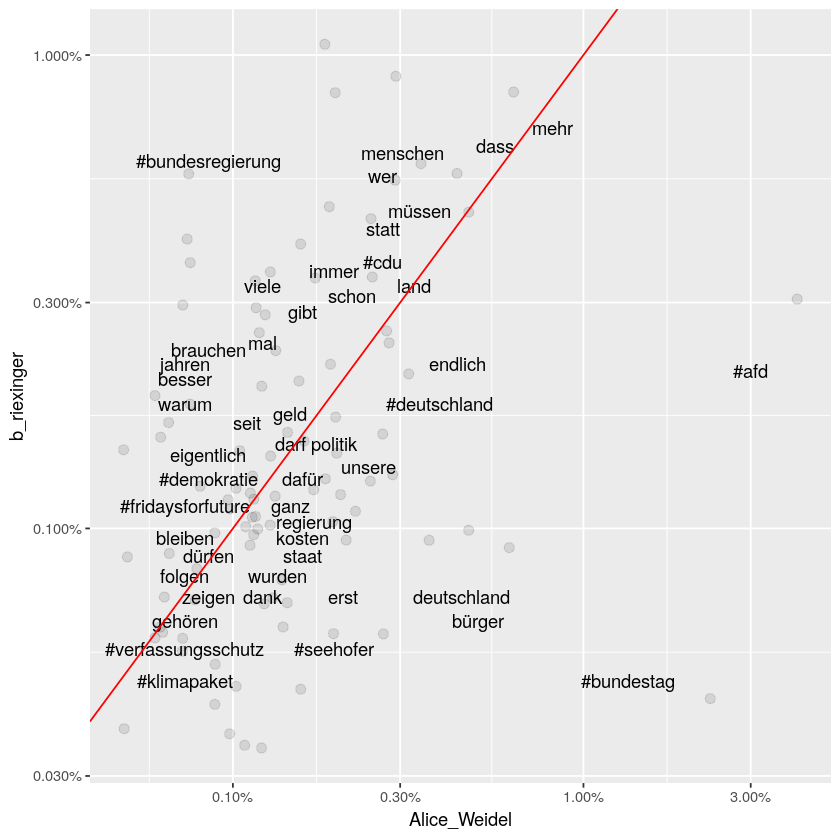

In [18]:
frequency2 %>% ggplot(aes(Alice_Weidel, b_riexinger)) +
  geom_jitter(alpha = 0.1, size = 2.5, width = 0.25, height = 0.25) +
  geom_text(aes(label = word), check_overlap = TRUE, vjust = 1.5) +
  scale_x_log10(labels = percent_format()) +
  scale_y_log10(labels = percent_format()) +
  geom_abline(color = "red")

In der Grafik sehen wir die relative häufigkeit der wörter die von den beiden Politikern genutzt wurden.

## Neuer Abschnitt

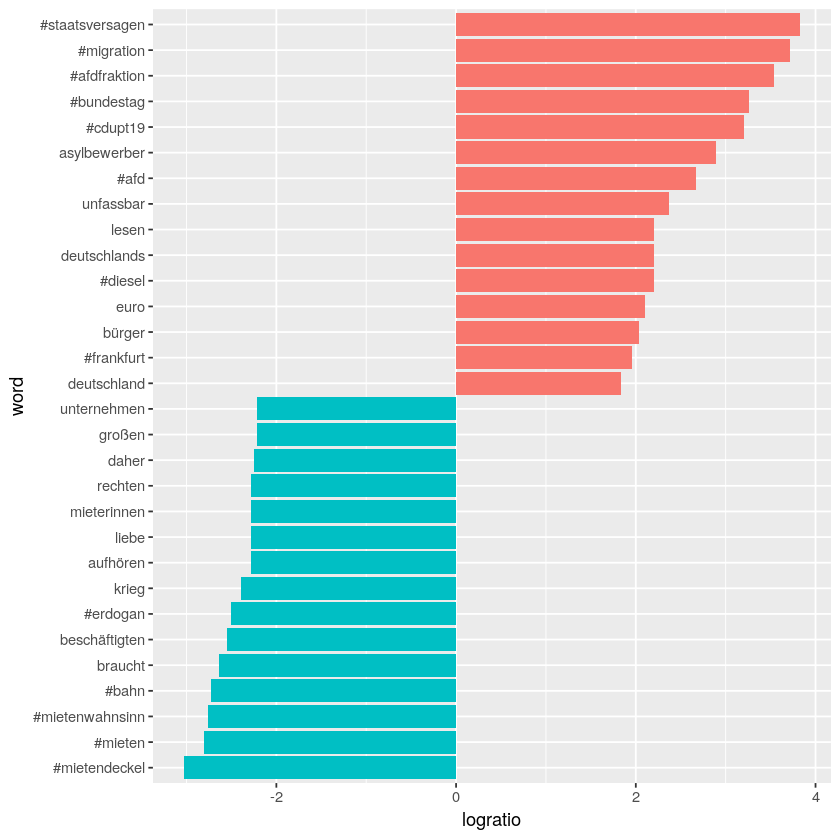

In [19]:
tidy_tweets %>%
  filter(!str_detect(word, "^@")) %>%
  count(word, collection) %>%
  group_by(word) %>%
  filter(sum(n) >= 10) %>%
  ungroup() %>%
  spread(collection, n, fill = 0) %>%
  mutate_if(is.numeric, list(~(. + 1) / (sum(.) + 1))) %>%
  mutate(logratio = log(Alice_Weidel / b_riexinger)) %>%
  arrange(desc(logratio)) %>%
  group_by(logratio < 0) %>%
  top_n(15, abs(logratio)) %>%
  ungroup() %>%
  mutate(word = reorder(word, logratio)) %>%
  ggplot(aes(word, logratio, fill = logratio < 0)) +
  geom_col(show.legend = FALSE) +
  coord_flip()